<a href="https://colab.research.google.com/github/heberpap/KlasifikasiSentimenAplikasiJMO/blob/main/Scrap_Ulasan_Aplikasi_JMO_lewat_Playstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Libraries**

In [ ]:
!conda install -y gdown
!pip install google-play-scraper
!pip install PySastrawi
!pip install python-docx

/bin/bash: line 1: conda: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184487 sha256=a5d11db36d9770b58b040265e134f48ef6a134c17ffbb6c5868b20262314d4af
  Stored in directory: /root/.cache/pip/wheels/80/27/06/837436d4c3bd989b957a91679966f207bfd71d358d63a8194d
Successfully built python-docx


# **Import Library**

In [ ]:
from google_play_scraper import app, Sort, reviews_all, reviews
import pandas as pd
import numpy as np
import re
import datetime as dt
import string
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import plotly.graph_objects as go
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
import nltk
import calendar
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
from docx import Document
from docx.shared import Pt
from docx.enum.text import WD_PARAGRAPH_ALIGNMENT
from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml
from IPython.display import display

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# **Scraping Data**

# **Scraping Ulasan Aplikasi JMO Mobile dari Google Play Store**

In [ ]:
# Scrape desired number of reviews
# Run Kode untuk Scrape data dengan jumlah tertentu.

result, continuation_token = reviews(
    'com.bpjstku',
    lang='id', # Defaults to 'id'
    country='id', # Defaults to 'id'
    sort=Sort.MOST_RELEVANT, # Defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count= 200000, # Defaults to 200.000
    filter_score_with=None # Defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)
data_ulasan_jmo = pd.DataFrame(np.array(result),columns=['review'])
data_ulasan_jmo = data_ulasan_jmo.join(pd.DataFrame(data_ulasan_jmo.pop('review').tolist()))

In [ ]:
data_ulasan_jmo.to_excel("Data Hasil Scraping.xlsx", index = False)
data_ulasan_jmo

# **Connect and Import Dataset dari Google Drive**

In [ ]:
!gdown --id 1up204C9wnDg6wNAJgeoh5ed9nU_Iao-l

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1up204C9wnDg6wNAJgeoh5ed9nU_Iao-l
To: /content/Data Hasil Scraping.xlsx
100% 32.5M/32.5M [00:01<00:00, 18.9MB/s]


# **Read Dataset**

In [ ]:
jmo = pd.read_excel("Data Hasil Scraping.xlsx")
# Menampilkan data
jmo.head()

reviewId                   userName  \
0  6ab936a3-c3f3-4087-be0b-81d73b9feab3  Hafizurrahman Dwi Saputra   
1  7d89dfdf-0541-4f1b-a03d-4399ddb91ea3             Yudhiana Amira   
2  87657c00-7644-462e-9d14-18bb344d2dd8               Jumadi Latan   
3  0524494c-4bea-42e1-a92d-d0f9f476458e                   apri ani   
4  ca342d41-3724-4a58-8fe5-0047e389ae8a                Qorib Fajri   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/AAcHTt...   
1  https://play-lh.googleusercontent.com/a-/AD_cM...   
2  https://play-lh.googleusercontent.com/a-/AD_cM...   
3  https://play-lh.googleusercontent.com/a/AAcHTt...   
4  https://play-lh.googleusercontent.com/a/AAcHTt...   

                                             content  score  thumbsUpCount  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...      1            146   
1  Awalnya aplikasi mudah untuk digunakan, lama k...      4            949   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...      2             47   
3  Aplikasi yang hanya bisa beroperasi di jam dan...      2            182   
4  tolong dibagian input tanggak lahir saat login...      3            509   

  reviewCreatedVersion                  at replyContent repliedAt appVersion  
0                4.7.0 2023-07-11 18:14:04          NaN       NaT      4.7.0  
1                4.6.8 2023-07-11 14:46:15          NaN       NaT      4.6.8  
2                4.7.0 2023-07-19 09:12:19          NaN       NaT      4.7.0  
3                4.6.8 2023-06-30 14:32:53          NaN       NaT      4.6.8  
4                4.6.3 2023-05-29 04:25:25          NaN       NaT      4.6.3

# **Summary**

In [ ]:
# Menampilkan ringkasan dataset yang berisi jumlah baris dan tipe data
info = jmo.info()
print('Ringkasan informasi:', info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              200000 non-null  object        
 1   userName              200000 non-null  object        
 2   userImage             200000 non-null  object        
 3   content               199999 non-null  object        
 4   score                 200000 non-null  int64         
 5   thumbsUpCount         200000 non-null  int64         
 6   reviewCreatedVersion  179189 non-null  object        
 7   at                    200000 non-null  datetime64[ns]
 8   replyContent          75218 non-null   object        
 9   repliedAt             75218 non-null   datetime64[ns]
 10  appVersion            179189 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 16.8+ MB
Ringkasan informasi: None


# **Menghitung missing values**

In [ ]:
# Menghitung dan menampilkan missing values
print('Jumlah missing values disetiap kolom:\n', jmo.isnull().sum())

Jumlah missing values disetiap kolom:
 reviewId                     0
userName                     0
userImage                    0
content                      1
score                        0
thumbsUpCount                0
reviewCreatedVersion     20811
at                           0
replyContent            124782
repliedAt               124782
appVersion               20811
dtype: int64


# **Hapus Kolom yang tidak memberikan info apapun**

In [ ]:
# menghapus kolom
jmo = jmo.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount',
                'reviewCreatedVersion', 'replyContent', 'repliedAt', 'appVersion'], axis=1)
jmo.head()

content  score  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...      1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...      4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...      2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...      2   
4  tolong dibagian input tanggak lahir saat login...      3   

                   at  
0 2023-07-11 18:14:04  
1 2023-07-11 14:46:15  
2 2023-07-19 09:12:19  
3 2023-06-30 14:32:53  
4 2023-05-29 04:25:25

# **Mengganti nama kolom**

In [ ]:
# Mengganti nama kolom
jmo.rename(columns={'content':'review'},inplace=True)
jmo.rename(columns={'score':'rate'},inplace=True)
jmo.rename(columns={'at':'date'},inplace=True)
print('Mengecek nama kolom yang sudah diganti:', jmo.columns)

Mengecek nama kolom yang sudah diganti: Index(['review', 'rate', 'date'], dtype='object')


# **Memisahkan tanggal yang ada di timestamps**

In [ ]:
# Memisahkan tanggal yang terletak di timestamps
jmo['date'] = pd.to_datetime(jmo['date']).dt.date
jmo.head()

review  rate        date
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1  2023-07-11
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4  2023-07-11
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2  2023-07-19
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2  2023-06-30
4  tolong dibagian input tanggak lahir saat login...     3  2023-05-29

In [ ]:
# Memisahkan tahun dan bulan
jmo['year'] = pd.to_datetime(jmo['date']).dt.year
jmo['month'] = pd.to_datetime(jmo['date']).dt.month

# **Visualisasi Data**

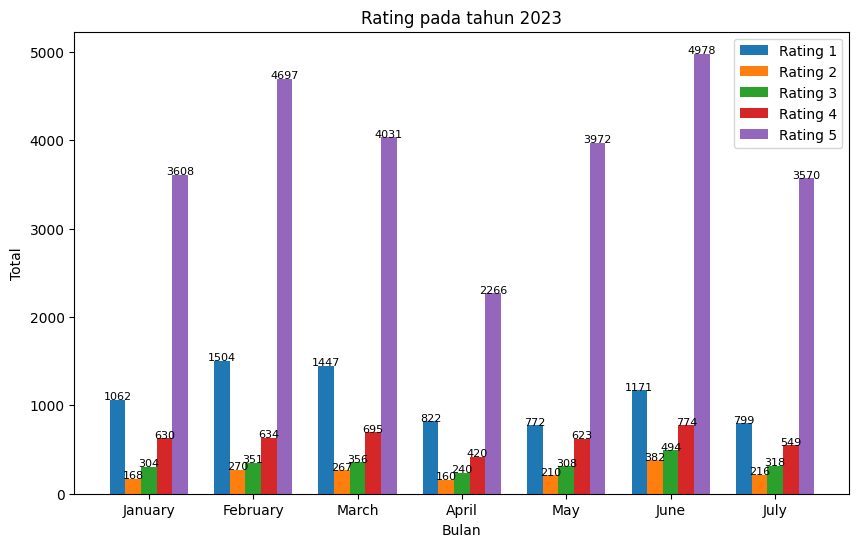

In [ ]:
# Tentukan tahun tertentu
tahun_tertentu = 2023

# Filter data berdasarkan tahun tertentu
data_tahun_tertentu = jmo[jmo['year'] == tahun_tertentu]

# Menghitung jumlah rating untuk setiap bulan dan rating pada tahun tertentu
rating_counts = data_tahun_tertentu.groupby(['month', 'rate']).size().unstack(fill_value=0)

# Mengambil bulan yang ada dalam data tahun tertentu
bulan = rating_counts.index

# Mengubah angka bulan menjadi nama bulan
bulan = [calendar.month_name[int(b)] for b in bulan]

# Menentukan posisi dan lebar batang
bar_width = 0.15
r = np.arange(len(bulan))

# Mengecek apakah ada data yang sesuai
if rating_counts.empty:
    print("Tidak ada data yang ditemukan.")
else:
    # Membuat diagram batang
    fig, ax = plt.subplots(figsize=(10, 6))

    # Iterasi melalui rating 1 sampai 5
    for i, rate in enumerate(range(1, 6)):
        ax.bar(r + i * bar_width, rating_counts[rate], width=bar_width, label=f'Rating {rate}')

        # Menambahkan keterangan jumlah di dalam diagram
        for j, count in enumerate(rating_counts[rate]):
            ax.text(r[j] + i * bar_width, count + 0.25, count, ha='center', fontsize=8)

    # Menambahkan label pada sumbu x dan y
    ax.set_xlabel('Bulan')
    ax.set_ylabel('Total')

    # Menambahkan judul diagram
    ax.set_title(f'Rating pada tahun {tahun_tertentu}')

    # Menambahkan ticks pada sumbu x
    ax.set_xticks(r + (4 * bar_width) / 2)
    ax.set_xticklabels(bulan)

    # Menambahkan legenda
    ax.legend()

    plt.show()


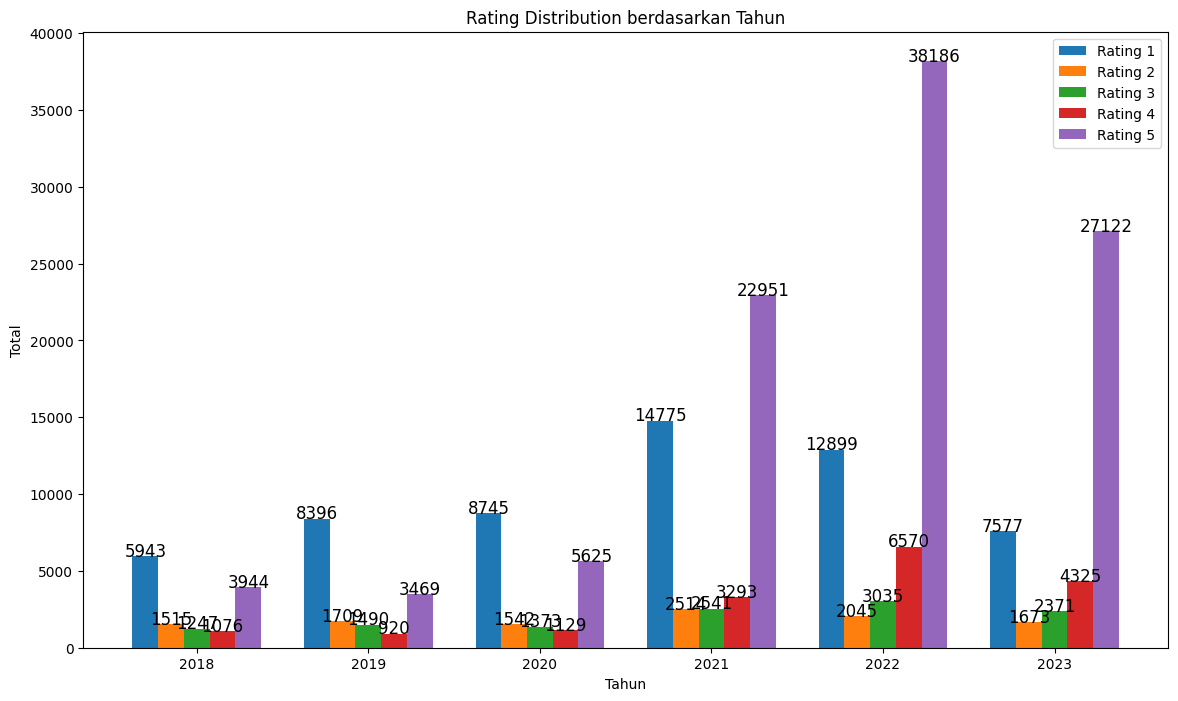

In [ ]:
# Menghitung jumlah rating untuk setiap tahun dan rating
rating_counts = jmo.groupby(['year', 'rate']).size().unstack(fill_value=0)

# Mengambil tahun yang ada dalam data
years = rating_counts.index

# Menentukan posisi dan lebar batang
bar_width = 0.15
r = np.arange(len(years))

# Membuat diagram batang
fig, ax = plt.subplots(figsize=(14, 8))

# Iterasi melalui rating 1 sampai 5
for i, rate in enumerate(range(1, 6)):
    ax.bar(r + i * bar_width, rating_counts[rate], width=bar_width, label=f'Rating {rate}')

    # Menambahkan keterangan jumlah di dalam diagram
    for j, count in enumerate(rating_counts[rate]):
        ax.text(r[j] + i * bar_width, count + 3.25, count, ha='center', fontsize=12)

# Menambahkan label pada sumbu x dan y
ax.set_xlabel('Tahun')
ax.set_ylabel('Total')

# Menambahkan judul diagram
ax.set_title('Rating Distribution berdasarkan Tahun')

# Menambahkan ticks pada sumbu x
ax.set_xticks(r + (4 * bar_width) / 2)
ax.set_xticklabels(years)

# Menambahkan legenda
ax.legend()

plt.show()


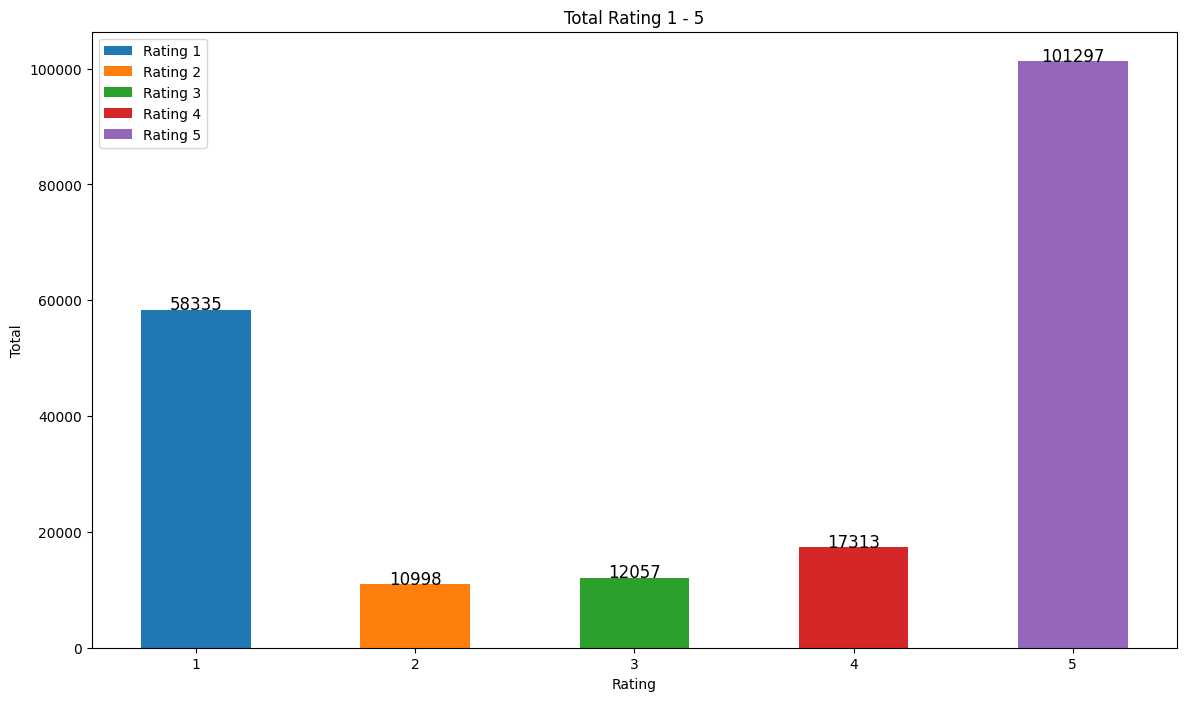

In [ ]:
# Menghitung total per rating
rating_totals = jmo['rate'].value_counts().sort_index()

# Mengambil rating 1 sampai 5
ratings = np.arange(1, 6)

# Menentukan posisi dan lebar batang
bar_width = 0.5
r = np.arange(len(ratings))

# Membuat diagram batang
fig, ax = plt.subplots(figsize=(14, 8))

# Iterasi melalui rating 1 sampai 5
for i, rating in enumerate(ratings):
    ax.bar(r[i], rating_totals.get(rating, 0), width=bar_width, label=f'Rating {rating}')

    # Menambahkan keterangan jumlah di dalam diagram
    ax.text(r[i], rating_totals.get(rating, 0) + 3.25, rating_totals.get(rating, 0), ha='center', fontsize=12)

# Menambahkan label pada sumbu x dan y
ax.set_xlabel('Rating')
ax.set_ylabel('Total')

# Menambahkan judul diagram
ax.set_title('Total Rating 1 - 5')

# Menambahkan ticks pada sumbu x
ax.set_xticks(r)
ax.set_xticklabels(ratings)

# Menambahkan legenda
ax.legend()

plt.show()


# **Hapus kolom yang tidak diperlukan lagi**

In [ ]:
jmo.drop(['date', 'year','month'], axis=1, inplace=True)

In [ ]:
print('Ringkasan dataset setelah dilakukan manipulasi data', jmo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  199999 non-null  object
 1   rate    200000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB
Ringkasan dataset setelah dilakukan manipulasi data None


In [ ]:
jmo.head()

review  rate
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2
4  tolong dibagian input tanggak lahir saat login...     3

# **Menghapus duplikat data yang ada pada kolom review**

In [ ]:
# Menghitung jumlah ulasan yang duplikasi
jmo.duplicated().sum()

66255

In [ ]:
# Menghapus duplikasi ulasan agar nantinya model tidak mempelajari kata yang sama secara berulang
jmo.drop_duplicates(inplace=True)

In [ ]:
# Mengecek kembali jumlah duplikat setelah di hapus
jmo.duplicated().sum()

0

In [ ]:
print('Ringkasan dataset setelah dilakukan manipulasi data', jmo.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133745 entries, 0 to 199999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   review  133744 non-null  object
 1   rate    133745 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.1+ MB
Ringkasan dataset setelah dilakukan manipulasi data None


In [ ]:
jmo.to_excel("Data Hasil Exploration.xlsx", index = False)

# **Connect and Import to Google Drive**

In [ ]:
!gdown --id 1TjwleMz-pAXGD3cXLDPYrqlVnD7-8HDv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TjwleMz-pAXGD3cXLDPYrqlVnD7-8HDv
To: /content/Data Hasil Exploration.xlsx
100% 5.65M/5.65M [00:00<00:00, 21.3MB/s]


# **Read Dataset**

In [ ]:
jmo = pd.read_excel("Data Hasil Exploration.xlsx")
# Menampilkan data
jmo.head()

review  rate
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2
4  tolong dibagian input tanggak lahir saat login...     3

# **Preprocessing**

# **Case Folding**

In [ ]:
# Merubah jenis huruf menjadi huruf kecil
def lowercase(review_text):
  low = review_text.lower()
  return low

jmo['case_folding'] = jmo['review'].apply(lambda low:lowercase(str(low)))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'case_folding'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                        case_folding  
0  dalam menu "pengaduan" pada bagian " data tida...  
1  awalnya aplikasi mudah untuk digunakan, lama k...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Hapus emoji**

In [ ]:
# Menghapus emoji menggunakan regex dan nilai unicode dari emoji

def remove_emoji(review_text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # Emoticons
                           u"\U0001F300-\U0001F5FF"  # Symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # Transport & map symbols
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', review_text)

jmo['remove_emoji'] = jmo['case_folding'].apply(lambda emoji: remove_emoji(emoji))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'case_folding','remove_emoji'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                        case_folding  \
0  dalam menu "pengaduan" pada bagian " data tida...   
1  awalnya aplikasi mudah untuk digunakan, lama k...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                                        remove_emoji  
0  dalam menu "pengaduan" pada bagian " data tida...  
1  awalnya aplikasi mudah untuk digunakan, lama k...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Hapus hastag**

In [ ]:
# Menghapus hashtag dari ulasan yang biasanya digunakan oleh pengguna untuk memberikan tagar
# Terkait topik dari ulasan yang diutarakan

def remove_hashtag(review_text, default_replace=""):
  hashtag = re.sub(r'#\w+', default_replace, review_text)
  return hashtag

jmo['remove_hastag'] = jmo['remove_emoji'].apply(lambda hashtag: remove_hashtag(hashtag))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_emoji', 'remove_hastag'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                        remove_emoji  \
0  dalam menu "pengaduan" pada bagian " data tida...   
1  awalnya aplikasi mudah untuk digunakan, lama k...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                                       remove_hastag  
0  dalam menu "pengaduan" pada bagian " data tida...  
1  awalnya aplikasi mudah untuk digunakan, lama k...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Hapus angka**

In [ ]:
# Menghapus angka dalam ulasan

def remove_number(review_text, default_replace=" "):
  num = re.sub(r'\d+', default_replace, review_text)
  return num

jmo['remove_number'] = jmo['remove_hastag'].apply(lambda num: remove_number(num))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_emoji', 'remove_number'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                        remove_emoji  \
0  dalam menu "pengaduan" pada bagian " data tida...   
1  awalnya aplikasi mudah untuk digunakan, lama k...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                                       remove_number  
0  dalam menu "pengaduan" pada bagian " data tida...  
1  awalnya aplikasi mudah untuk digunakan, lama k...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Hapus tanda baca**

In [ ]:
# Menghapus tanda baca

def remove_punctuation(review_text, default_text=" "):
  list_punct = string.punctuation
  delete_punct = str.maketrans(list_punct,' '*len(list_punct))
  new_review = ' '.join(review_text.translate(delete_punct).split())

  return new_review

jmo['remove_punctuation'] = jmo['remove_number'].apply(lambda punct: remove_punctuation(punct))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_number', 'remove_punctuation'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                       remove_number  \
0  dalam menu "pengaduan" pada bagian " data tida...   
1  awalnya aplikasi mudah untuk digunakan, lama k...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                                  remove_punctuation  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Hapus Karakter**

In [ ]:
# Menghapus superscript dalam ulasan yang biasa digunakan oleh pengguna dalam mengulangi kata

def remove_superscript(review_text):
  number = re.compile("["u"\U00002070"
                      u"\U000000B9"
                      u"\U000000B2-\U000000B3"
                      u"\U00002074-\U00002079"
                      u"\U0000207A-\U0000207E"
                      u"U0000200D"
                      "]+", flags=re.UNICODE)
  return number.sub(r'', review_text)

jmo['remove_superscript'] = jmo['remove_punctuation'].apply(lambda num: remove_superscript(num))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_punctuation', 'remove_superscript'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                  remove_punctuation  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                                  remove_superscript  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Menghilangkan pengulangan kata**

In [ ]:
# Melakukan pembatasan jumlah huruf menjadi dua untuk mengembalikan kata ke bentuk awal
# Dan menghindari terjadinya kata ganda yang memiliki arti sama tetapi berbeda penulisan

def word_repetition(review_text):
  review = re.sub(r'(.)\1+', r'\1\1', review_text)
  return review

jmo['remove_word_repetition'] = jmo['remove_superscript'].apply(lambda word: word_repetition(word))

In [ ]:
# Melakukan pembatasan kata berulang menjadi satu kali, seperti suka suka -> suka

def repetition(review_text):
  repeat = re.sub(r'\b(\w+)(?:\W\1\b)+', r'\1',review_text, flags=re.IGNORECASE)
  return repeat

jmo['remove_word_repetition'] = jmo['remove_word_repetition'].apply(lambda word: repetition(word))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_superscript', 'remove_word_repetition'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                  remove_superscript  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                              remove_word_repetition  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Menghapus spasi berlebih**

In [ ]:
# Menghapus spasi berlebih dalam ulasan

def remove_extra_whitespaces(review_text):
  review = re.sub(r'\s+',' ', review_text)
  return review

jmo['remove_whihespaces'] = jmo['remove_word_repetition'].apply(lambda extra_spaces: remove_extra_whitespaces(extra_spaces))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_word_repetition', 'remove_whihespaces'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                              remove_word_repetition  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                                  remove_whihespaces  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum nya aplikasi ini bisa di gunakan dan t...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

# **Menghapus beberapa kata yang tidak memberi informasi apapun**

In [ ]:
bannedword = ['uqjy', 'dehdje', 'jwdnmb', 'wxvlezuvws', 'ircel', 'swjjw', 'dmv',
         'dxrgz', 'qjtajuq', 'zzhwntdft', 'xywrfw' ,'fztnmdrrduy', 'xsezuz',
         'kbyv', 'iyyveyzqkdgm', 'arlrmdjy', 'sfarif', 'sfomar',
         'nzxx', 'mtsco', 'wkwk', 'wkwkw', 'wkwkwk', 'hihi', 'hihihii', 'hihihi',
         'hehehe', 'hehehehe', 'hehe', 'huhu', 'huhuu', 'ancok', 'guak', 'hhmm',
         'huftt', 'yg', 'ny', 'd', 'kalo', 'amp', 'nya', 'nih', 'sih', 'si', 'tuh',
         'nyg', 'hehe', 'pen', 'nan', 'loh', '&amp', 'yah']

re_banned_words = re.compile(r"\b(" + "|".join(bannedword) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)

jmo['remove_meaningless_word'] = jmo['remove_whihespaces'].apply(lambda banned:RemoveBannedWords(banned))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_whihespaces', 'remove_meaningless_word'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                  remove_whihespaces  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                             remove_meaningless_word  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum aplikasi ini bisa di gunakan dan tidak...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

In [ ]:
jmo.to_excel("For_Slang_Text.xlsx", index = False)

# **Normalisasi Kata**

In [ ]:
!gdown --id 17hJrW_F5zZcMk42CuJAq-I-iz3ENkeqL

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17hJrW_F5zZcMk42CuJAq-I-iz3ENkeqL
To: /content/For_Slang_Text.xlsx
100% 8.33M/8.33M [00:00<00:00, 18.2MB/s]


In [ ]:
jmo = pd.read_excel("For_Slang_Text.xlsx")
# Menampilkan data
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                  remove_whihespaces  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum nya aplikasi ini bisa di gunakan dan t...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                             remove_meaningless_word  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum aplikasi ini bisa di gunakan dan tidak...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat login...

In [ ]:
# Memproses data secara bertahap dengan ukuran batch
batch_size = 1000
total_data = len(jmo['remove_meaningless_word'])
num_batches = total_data // batch_size + 1

for batch_index in range(num_batches):
    start_index = batch_index * batch_size
    end_index = min((batch_index + 1) * batch_size, total_data)
    batch_data = jmo['remove_meaningless_word'][start_index:end_index]

    # Membuat dokumen Word baru untuk setiap batch
    document = Document()

    # Membuat objek style dan mengatur penspasian baris
    style = document.styles['Normal']
    font = style.font
    font.name = 'Times New Roman'
    font.size = Pt(12)
    xml_spacing = """
        <w:spacing xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" w:line="240" w:lineRule="auto"/>
    """
    paragraph_format = style.paragraph_format
    paragraph_format.space_before = Pt(0)
    paragraph_format.space_after = Pt(0)
    paragraph_format._element.append(parse_xml(xml_spacing))


    # Iterasi melalui setiap review dalam batch_data
    for review in batch_data:
      if isinstance(review, str):  # Check if the review is a string
          text = review.split()

          # Iterasi melalui setiap token dalam review
          for token_review in text:
              token_review_with_colon = token_review + " : "
              paragraph = document.add_paragraph(token_review_with_colon)
              paragraph.style = style


    # Menentukan nama file Word untuk setiap batch
    nama_file = f"slang_batch_{batch_index}.docx"

    # Menyimpan dokumen Word untuk setiap batch
    document.save(nama_file)


In [ ]:
from docx import Document

# Membuat dokumen Word baru
document_combined = Document()

# Mengatur objek style untuk ukuran font dan jenis font
style = document_combined.styles['Normal']
font = style.font
font.name = 'Times New Roman'
font.size = Pt(12)

# Mengatur penspasian baris
xml_spacing = """
    <w:spacing xmlns:w="http://schemas.openxmlformats.org/wordprocessingml/2006/main" w:line="240" w:lineRule="auto"/>
"""
paragraph_format = style.paragraph_format
paragraph_format.space_before = Pt(0)
paragraph_format.space_after = Pt(0)
paragraph_format._element.append(parse_xml(xml_spacing))

# Memproses data secara bertahap dengan ukuran batch
batch_size = 1000
total_data = len(jmo['remove_meaningless_word'])
num_batches = total_data // batch_size + 1

# Iterasi melalui setiap batch
for batch_index in range(num_batches):
    start_index = batch_index * batch_size
    end_index = min((batch_index + 1) * batch_size, total_data)
    batch_data = jmo['remove_meaningless_word'][start_index:end_index]

    # Membaca file batch yang telah disimpan
    nama_file = f"slang_batch_{batch_index}.docx"
    document_batch = Document(nama_file)

    # Menyalin konten dari file batch ke dalam file dokumen kombinasi
    for element in document_batch.element.body:
        document_combined.element.body.append(element)

# Menentukan nama file untuk dokumen Word kombinasi
nama_file_combined = 'Slang.docx'

# Menyimpan dokumen Word kombinasi ke dalam satu file
document_combined.save(nama_file_combined)


In [ ]:
!gdown --id 1movFmzJKlg3eQJBQWH7k0xQXHyBVWHaN

slangs = open('Slang.txt',"r",encoding="utf-8", errors='replace')

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1movFmzJKlg3eQJBQWH7k0xQXHyBVWHaN
To: /content/Slang.txt
100% 428k/428k [00:00<00:00, 135MB/s]


In [ ]:
clear_slangs= []
for newlines in slangs:
  strip_re = newlines.strip("\n")
  split = re.split(r'[:]',strip_re)
  clear_slangs.append(split)

print(clear_slangs)

[['& ', ' dan'], ['10jt ', ' sepuluh juta'], ['10k ', ' sepuluh ribu'], ['10kk ', ' sepuluh juta'], ['10rb ', ' sepuluh ribu'], ['10th ', ' sepuluh tahun'], ['120k ', ' seratus dua puluh ribu'], ['13rb ', ' tiga belas ribu'], ['145k ', ' seratus empat puluh lima ribu'], ['149rb ', ' seratus empat puluh sembilan ribu'], ['14rb ', ' empat belas ribu'], ['15jt ', ' lima belas juta'], ['16gb ', ' enam belas giga byte'], ['16jam ', ' enam belas jam'], ['16th ', ' enam belas tahun'], ['17an ', ' tujuh belasan'], ['1jt ', ' satu juta'], ['1kg ', ' satu kilogram'], ['1periode ', ' satu periode'], ['1st ', ' pertama'], ['1t ', ' satu triliun'], ['200an ', ' dua ratusan'], ['200rbu ', ' dua ratus ribu'], ['2018gantigubernur ', ' 2018 ganti gubernur'], ['2019asalbukanjokowi ', ' 2019 asal bukan jokowi'], ['2019forjkw ', ' 2019 for jokowi'], ['2019g ', ' 2019 ganti presiden'], ['2019ga ', ' 2019 ganti presiden'], ['2019ganti ', ' 2019 ganti presiden'], ['2019gantikacung ', ' 2019 ganti kacung'], [

In [ ]:
# Membaca isi file dan mengubahnya menjadi kamus
def read_slangs_file(filename):
    slangs_dict = {}

    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()
            if ':' in line:
                key, value = line.split(':', 1)
                slangs_dict[key.strip()] = value.strip()

    return slangs_dict

# Nama file yang berisi daftar kata slang dan artinya
file_path = 'Slang.txt'

# Membaca file dan menghasilkan kamus
dict_slangs = read_slangs_file(file_path)

# Menampilkan kamus kata slang dan artinya
for kata, arti in dict_slangs.items():
    print(f'{kata}: {arti}')


Output streaming akan dipotong hingga 5000 baris terakhir.
pesenan: pesanan
pesenin: pesankan
pesepakbola: pemain sepak bola
peserra: peserta
peseta: peserta
pesrsulit: sulit
petahana: pertahanan
petamina: pertamina
pete: petai
petet: sipit
petikpari: petik pari
petinggi2: petinggi petinggi
petromax: petromaks
petunjuknya: petunjuk nya
peyang: peang
pfi: private finance initiative
pg: pergi
pgang: pegang
pgen: ingin
pghadangan: pengadangan
pghargaan: penghargaan
pghasiln: penghasilan
pgi: pergi
pgin: ingin
pgluarn: pengeluaran
pgn: ingin
pgnnya: inginnya
phelana: pelana
phenomenal: fenomenal
philipina: filipina
phiraun: firaun
phk: pihak
phobia: fobia
photo: foto
php: pemberi harapan palsu
pi: tapi
picek: picek
picrk: picek
pict: gambar
pidakan: pidanakan
pidex: injak
pie: bagaimana
piece: item
pihak2: pihak pihak
pihk: pihak
piiink: merah muda
pijetin: pijitkan
pijit: pijat
pikir2: pikir pikir
pikiran2: pikiran pikiran
pikirin: pikirkan
pikirqu: pikirku
pileg: pilihan legislatif
pilem

In [ ]:
clean_text = []
for review in jmo['remove_meaningless_word']:
    if isinstance(review, str):  # Check if the review is a string
        wordlist = TextBlob(review).words
        for k, v in enumerate(wordlist):
            if v in dict_slangs.keys():
                wordlist[k] = dict_slangs[v]
        clean_text.append(' '.join(wordlist))
    else:
        # Handle non-string values (e.g., float) if needed
        # You can skip or handle these cases according to your specific needs
        clean_text.append(str(review))  # Convert to string or perform appropriate handling


In [ ]:
clean_text

['dalam menu pengaduan pada bagian data tidak sesuai sudah di isi sesuai dengan keadaan sebenarnya waktu dilihat di bagian riwayat pengaduan justru katanya tidak dapat terhubung ke server sudah ditunggu selama seminggu masuk sama nampaknya tidak niat dan tidak mampu untuk menjalankan sistem mobile',
 'awalnya aplikasi mudah untuk digunakan lama kelamaan untuk masuk saja tidak bisa dengan alasan kpj tidak terdaftar membuat akun baru muncul kpj sudah didaftarkan aneh padahal sebelumnya tiap buka aplikasi tidak ada kendala sampai harus membuat kata sandi baru lagi tetap saja muncul keterangan kpj tidak terdaftar sangat mengecewakan',
 'sebelum aplikasi ini bisa di gunakan dan tidak bermasalah membuat masuk ke akun tapi lalu kenapa tidak bisa dibuka keterangan akun belum terdaftar padahal email dan kata sandi sama digunakan akan aneh konyol tolong dong sistem dipermudah',
 'aplikasi yang hanya bisa beroperasi di jam dan hari kerja saja entah itu tidak ada jdwal shifting atau memang aplikas

In [ ]:
jmo['normalization'] = clean_text

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'remove_meaningless_word', 'normalization'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                             remove_meaningless_word  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum aplikasi ini bisa di gunakan dan tidak...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat login...   

                                       normalization  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum aplikasi ini bisa di gunakan dan tidak...  
3  aplikasi yang hanya bisa beroperasi di jam dan...  
4  tolong dibagian input tanggak lahir saat masuk...

# **Hapus kata kata yang berisi 3 huruf**

In [ ]:
def remove_small_words(text):
  text = re.sub(r'\b\w{1,3}\b','',text)
  return text

In [ ]:
jmo['final_text'] = jmo['normalization'].apply(lambda remove: remove_small_words(str(remove)))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'normalization', 'final_text'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                       normalization  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum aplikasi ini bisa di gunakan dan tidak...   
3  aplikasi yang hanya bisa beroperasi di jam dan...   
4  tolong dibagian input tanggak lahir saat masuk...   

                                          final_text  
0  dalam menu pengaduan pada bagian data tidak se...  
1  awalnya aplikasi mudah untuk digunakan lama ke...  
2  sebelum aplikasi  bisa  gunakan  tidak bermasa...  
3  aplikasi yang hanya bisa beroperasi    hari ke...  
4  tolong dibagian input tanggak lahir saat masuk...

# **Word Tokenizing**

In [ ]:
def word_token(review_text):
  return word_tokenize(review_text)

In [ ]:
jmo['token'] = jmo['final_text'].apply(lambda tokenize:word_token(str(tokenize)))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'final_text', 'token'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                          final_text  \
0  dalam menu pengaduan pada bagian data tidak se...   
1  awalnya aplikasi mudah untuk digunakan lama ke...   
2  sebelum aplikasi  bisa  gunakan  tidak bermasa...   
3  aplikasi yang hanya bisa beroperasi    hari ke...   
4  tolong dibagian input tanggak lahir saat masuk...   

                                               token  
0  [dalam, menu, pengaduan, pada, bagian, data, t...  
1  [awalnya, aplikasi, mudah, untuk, digunakan, l...  
2  [sebelum, aplikasi, bisa, gunakan, tidak, berm...  
3  [aplikasi, yang, hanya, bisa, beroperasi, hari...  
4  [tolong, dibagian, input, tanggak, lahir, saat...

# **Wordcloud Visualization**

In [ ]:
review_all = []

for review in jmo['final_text']:
  text = review.split()
  for token_review in text:
    print(token_review)
    review_all.append(token_review)

Output streaming akan dipotong hingga 5000 baris terakhir.
saldo
kami
kami
jangan
dipersulit
katanya
tidak
bisa
proses
persetujuan
tapi
sudah
seminggu
tidak
balas
email
telepon
call
center
jawabnya
sedang
maintenance
semua
maintenance
situs
aplikasi
mobile
sampai
sistem
call
center
pusat
juga
maintenance
pemerintah
sehat
belum
siap
jangan
dilakukan
lakukan
sudah
siap
maaf
yang
berkomentar
negatif
mungkin
kamu
kurang
mencermati
langkah
caranya
saya
berhasil
masuk
walaupun
awalnya
sedikit
bingung
setelah
verifikasi
email
kartu
tanda
penduduk
sesuai
masuk
aplikasi
terdahulu
saya
bisa
melihat
informasi
lengkap
rincian
saldo
sesuai
dengan
data
sebelumnya
terima
kasih
atas
kemudahannya
kalau
masuk
develop
jangan
peluncuran
saja
dahulu
sejauh
sudah
lumayan
bagus
kerja
makian
tolong
perbaikan
secepat
tidak
guna
unduh
aplikasi
tidak
jelas
kalau
perbaiki
tolong
yang
benar
aplikasi
masuk
eror
masuk
tolong
perbaiki
terlebih
dahulu
sebelum
keluar
updatenya
recomen
sangat
tetapi
langkah
baik
jika
ta

In [ ]:
# Menampilkan kata dengan jumlah kemunculan yang paling dibahas oleh pengguna
freq_dist = FreqDist(review_all)
print("banyak frekuensi distribusi sample dari ulasan aplikasi jmo")
freq_dist

banyak frekuensi distribusi sample dari ulasan aplikasi jmo


FreqDist({'tidak': 80185, 'bisa': 56431, 'aplikasi': 55315, 'saya': 40255, 'masuk': 32329, 'sudah': 31132, 'sangat': 22341, 'kenapa': 18286, 'terus': 17415, 'perbarui': 17259, ...})

In [ ]:
# Menampilkan 500 kata yang paling sering muncul

common_review = freq_dist.most_common(500)
print(common_review)

[('tidak', 80185), ('bisa', 56431), ('aplikasi', 55315), ('saya', 40255), ('masuk', 32329), ('sudah', 31132), ('sangat', 22341), ('kenapa', 18286), ('terus', 17415), ('perbarui', 17259), ('saja', 14243), ('saldo', 13871), ('lagi', 13409), ('email', 12444), ('bagus', 12237), ('data', 12106), ('bahkan', 11779), ('padahal', 11562), ('untuk', 11108), ('jaminan', 11019), ('buka', 10927), ('membantu', 10902), ('badan', 10855), ('sosial', 10741), ('penyelenggara', 10689), ('tolong', 10611), ('kasih', 9616), ('membuat', 9558), ('bagaimana', 9415), ('yang', 9164), ('saat', 8764), ('susah', 8598), ('tapi', 8230), ('lebih', 8119), ('mudah', 7952), ('terima', 7738), ('selalu', 7509), ('daftar', 7413), ('terdaftar', 7271), ('mohon', 6968), ('baru', 6965), ('sama', 6833), ('nomor', 6654), ('jadi', 6585), ('akun', 6317), ('klaim', 6311), ('setelah', 6308), ('mantap', 6065), ('baik', 6004), ('dengan', 5996), ('kartu', 5883), ('juga', 5761), ('dari', 5622), ('benar', 5479), ('seperti', 5433), ('sekaran

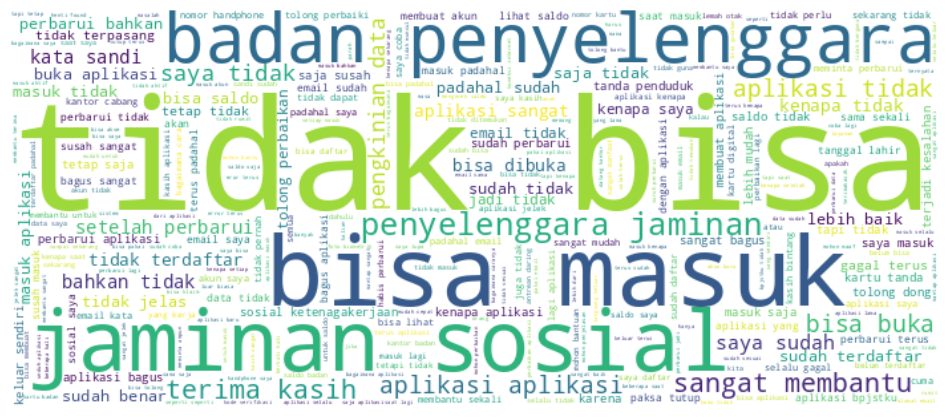

In [ ]:
# Membuat visualisasi WordCloud

join_review = ' '.join(review_all)

w_cloud = WordCloud(background_color="white",
                    width=700, height=300, max_font_size=120,
                    max_words=500, contour_color='blue',
                    contour_width=2).generate(str(join_review))

# plot wordcloud
plt.figure(figsize=(12,12))
plt.imshow(w_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

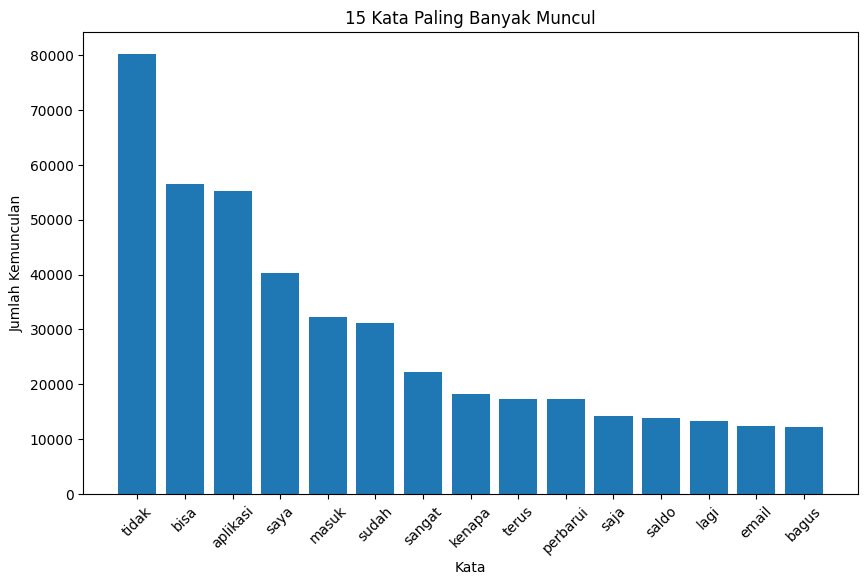

In [ ]:
import matplotlib.pyplot as plt

common_review = freq_dist.most_common(500)
top15 = common_review[:15]

words = [word for word, count in top15]
counts = [count for word, count in top15]

plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.xlabel('Kata')
plt.ylabel('Jumlah Kemunculan')
plt.title('15 Kata Paling Banyak Muncul')

plt.show()


# **Hapus stopword dalam bahasa indonesia**

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('popular')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data] 

True

In [ ]:
# Menampilkan kata stopwords bahasa indonesia
indonesian_stop = stopwords.words('indonesian')

# Menghitung jumlah kata stopwords bahasa indonesia
print('length of indonesian stopwords:', len(indonesian_stop))

length of indonesian stopwords: 758


In [ ]:
# Memasukkan stopwords bahasa indonesia ke dalam dataframe

stopwords_indo = pd.DataFrame(indonesian_stop, columns=['stopwords_indonenesia'])

In [ ]:
# Menyimpan stopwords bahasa indonesia ke dalam format xlsx
stopwords_indo.to_excel('Stopwords_Indonesian.xlsx', index=False)

In [ ]:
def remove_stopwords(review_text, indo_stopwords):
  tokenize = []
  for token in review_text:
    if token not in indo_stopwords:
      tokenize.append(token)

  return tokenize

jmo['stopwords'] = jmo['token'].apply(lambda stop: remove_stopwords(stop, indonesian_stop))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'token', 'stopwords'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                               token  \
0  [dalam, menu, pengaduan, pada, bagian, data, t...   
1  [awalnya, aplikasi, mudah, untuk, digunakan, l...   
2  [sebelum, aplikasi, bisa, gunakan, tidak, berm...   
3  [aplikasi, yang, hanya, bisa, beroperasi, hari...   
4  [tolong, dibagian, input, tanggak, lahir, saat...   

                                           stopwords  
0  [menu, pengaduan, data, sesuai, sesuai, riwaya...  
1  [aplikasi, mudah, masuk, alasan, terdaftar, ak...  
2  [aplikasi, bermasalah, masuk, akun, dibuka, ke...  
3  [aplikasi, beroperasi, kerja, jdwal, shifting,...  
4  [tolong, dibagian, input, tanggak, lahir, masu...

# **Stemming Normalization**

In [ ]:
def back_to_root(review_text):
  stop_token = ' '.join(review_text)
  stem = StemmerFactory()
  create_stem = stem.create_stemmer()
  result_stem = create_stem.stem(stop_token)
  return result_stem

jmo['stemming'] = jmo['stopwords'].apply(lambda stem:back_to_root(stem))

In [ ]:
jmo = pd.DataFrame(jmo, columns=['review', 'rate', 'stopwords', 'stemming'])
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                           stopwords  \
0  [menu, pengaduan, data, sesuai, sesuai, riwaya...   
1  [aplikasi, mudah, masuk, alasan, terdaftar, ak...   
2  [aplikasi, bermasalah, masuk, akun, dibuka, ke...   
3  [aplikasi, beroperasi, kerja, jdwal, shifting,...   
4  [tolong, dibagian, input, tanggak, lahir, masu...   

                                            stemming  
0  menu adu data sesuai sesuai riwayat adu hubung...  
1  aplikasi mudah masuk alas daftar akun muncul d...  
2  aplikasi masalah masuk akun buka terang akun d...  
3  aplikasi operasi kerja jdwal shifting aplikasi...  
4  tolong bagi input tanggak lahir masuk ubah kas...

In [ ]:
jmo.to_excel('Data_After_Stemming.xlsx', index=False)

In [ ]:
jmo = pd.read_excel("Data_After_Stemming.xlsx")
# Menampilkan data
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                           stopwords  \
0  ['menu', 'pengaduan', 'data', 'sesuai', 'sesua...   
1  ['aplikasi', 'mudah', 'masuk', 'alasan', 'terd...   
2  ['aplikasi', 'bermasalah', 'masuk', 'akun', 'd...   
3  ['aplikasi', 'beroperasi', 'kerja', 'jdwal', '...   
4  ['tolong', 'dibagian', 'input', 'tanggak', 'la...   

                                            stemming  
0  menu adu data sesuai sesuai riwayat adu hubung...  
1  aplikasi mudah masuk alas daftar akun muncul d...  
2  aplikasi masalah masuk akun buka terang akun d...  
3  aplikasi operasi kerja jdwal shifting aplikasi...  
4  tolong bagi input tanggak lahir masuk ubah kas...

In [ ]:
# Load the Excel file into a DataFrame
file_path = "Data_After_Stemming.xlsx"
data = pd.read_excel(file_path)

# Drop rows with empty values in the "stemming" column
data_cleaned = data.dropna(subset=['stemming'])

# Save the cleaned DataFrame back to the Excel file
cleaned_file_path = "Cleaned_Data_After_Stemming.xlsx"
data_cleaned.to_excel(cleaned_file_path, index=False)



In [ ]:
jmo = pd.read_excel("Cleaned_Data_After_Stemming.xlsx")
# Menampilkan data
jmo.head()

review  rate  \
0  Dalam menu "Pengaduan" pada bagian " Data tida...     1   
1  Awalnya aplikasi mudah untuk digunakan, lama k...     4   
2  Sebelum nya aplikasi ini bisa di gunakan dan t...     2   
3  Aplikasi yang hanya bisa beroperasi di jam dan...     2   
4  tolong dibagian input tanggak lahir saat login...     3   

                                           stopwords  \
0  ['menu', 'pengaduan', 'data', 'sesuai', 'sesua...   
1  ['aplikasi', 'mudah', 'masuk', 'alasan', 'terd...   
2  ['aplikasi', 'bermasalah', 'masuk', 'akun', 'd...   
3  ['aplikasi', 'beroperasi', 'kerja', 'jdwal', '...   
4  ['tolong', 'dibagian', 'input', 'tanggak', 'la...   

                                            stemming  
0  menu adu data sesuai sesuai riwayat adu hubung...  
1  aplikasi mudah masuk alas daftar akun muncul d...  
2  aplikasi masalah masuk akun buka terang akun d...  
3  aplikasi operasi kerja jdwal shifting aplikasi...  
4  tolong bagi input tanggak lahir masuk ubah kas...

In [ ]:
score_counts = jmo['rate'].value_counts().sort_index()

# Display the count for each rating score
for score in range(1, 6):
    count = score_counts.get(score, 0)
    print(f"Score {score}: {count} reviews")

Score 1: 54929 reviews
Score 2: 10349 reviews
Score 3: 9617 reviews
Score 4: 9155 reviews
Score 5: 45605 reviews


In [ ]:
import pandas as pd

# Assuming you have already loaded your data into the 'jmo' DataFrame

# Count the number of reviews for each rating score
score_counts = jmo['rate'].value_counts()

# Find the minimum count of reviews among all rating scores
min_count = score_counts.min()

# Function to filter reviews by score and non-empty stemming column
def filter_reviews_by_score_and_stemming(df, score, count):
    return df[(df['rate'] == score) & (df['stemming'].notnull())].sample(count, random_state=42)

# List to store DataFrames for each score
filtered_dataframes = []

# Loop through each rating score (1 to 5) and filter reviews
for score in range(1, 6):
    filtered_df = filter_reviews_by_score_and_stemming(jmo, score, min_count)
    filtered_dataframes.append(filtered_df)

# Concatenate all the filtered DataFrames into a single DataFrame
final_data = pd.concat(filtered_dataframes, ignore_index=True)

# Display the final DataFrame as a table
display(final_data)

# Save the final DataFrame to a new Excel file (optional)
final_data.to_excel("Filtered_Data_Short_By_Score.xlsx", index=False)


review  rate  \
0                                  bikin akun gak bisa..     1   
1      Tolong perbaiki aplikasinya bukannya mempermud...     1   
2      Kenapa cabang di Tangerang Cikupa antrian onli...     1   
3      bajingan bangsat kenapa dari kmren ga bisa log...     1   
4              Selalu susah untuk masuk selalu pembaruan     1   
...                                                  ...   ...   
45770                                  JMO update banget     5   
45771  Ya inti'y lumayan lah untuk membantu cek dana ...     5   
45772      sangat bagus dan mudah mendapat notofasi baru     5   
45773           Sangat membantu dalam mengecek saldo JHT     5   
45774  Mempermudah agar tidak antri di kantor, terima...     5   

                                               stopwords  \
0                                               ['akun']   
1      ['tolong', 'perbaikan', 'aplikasi', 'mempermud...   
2      ['cabang', 'tanggerang', 'cikupa', 'antrean', ...   
3      ['makian', 'makian', 'kemarin', 'masuk', 'maki...   
4                         ['susah', 'masuk', 'perbarui']   
...                                                  ...   
45770                                       ['perbarui']   
45771            ['inti', 'lumayan', 'membantu', 'dana']   
45772                     ['bagus', 'mudah', 'notofasi']   
45773                              ['membantu', 'saldo']   
45774  ['mempermudah', 'antre', 'kantor', 'terima', '...   

                                                stemming  
0                                                   akun  
1                       tolong baik aplikasi mudah sulit  
2         cabang tanggerang cikupa antre onlinenya penuh  
3      maki maki kemarin masuk maki aplikasi perintah...  
4                                       susah masuk baru  
...                                                  ...  
45770                                               baru  
45771                            inti lumayan bantu dana  
45772                               bagus mudah notofasi  
45773                                        bantu saldo  
45774                    mudah antre kantor terima kasih  

[45775 rows x 4 columns]

In [ ]:
# Read the data from the Excel file
jmo = pd.read_excel("Filtered_Data_Short_By_Score.xlsx")

# Count the occurrences of each rating score (1 to 5)
score_counts = jmo['rate'].value_counts().sort_index()

# Display the count for each rating score
for score in range(1, 6):
    count = score_counts.get(score, 0)
    print(f"Score {score}: {count} reviews")


Score 1: 9155 reviews
Score 2: 9155 reviews
Score 3: 9155 reviews
Score 4: 9155 reviews
Score 5: 9155 reviews


# **Translate Data**

In [ ]:
!gdown --id 1BmJ0rBPvGp4iUYrNbofw9_7Q7APciNOt

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BmJ0rBPvGp4iUYrNbofw9_7Q7APciNOt
To: /content/Filtered_Data_Short_By_Score.xlsx
100% 3.56M/3.56M [00:00<00:00, 65.3MB/s]


In [ ]:
jmo = pd.read_excel("Filtered_Data_Short_By_Score.xlsx")
# Menampilkan data
jmo.head()

review  rate  \
0                              bikin akun gak bisa..     1   
1  Tolong perbaiki aplikasinya bukannya mempermud...     1   
2  Kenapa cabang di Tangerang Cikupa antrian onli...     1   
3  bajingan bangsat kenapa dari kmren ga bisa log...     1   
4          Selalu susah untuk masuk selalu pembaruan     1   

                                           stopwords  \
0                                           ['akun']   
1  ['tolong', 'perbaikan', 'aplikasi', 'mempermud...   
2  ['cabang', 'tanggerang', 'cikupa', 'antrean', ...   
3  ['makian', 'makian', 'kemarin', 'masuk', 'maki...   
4                     ['susah', 'masuk', 'perbarui']   

                                            stemming  
0                                               akun  
1                   tolong baik aplikasi mudah sulit  
2     cabang tanggerang cikupa antre onlinenya penuh  
3  maki maki kemarin masuk maki aplikasi perintah...  
4                                   susah masuk baru

In [ ]:
pip install pandas googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 564.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=0fbd7ce3b0569f667319cbadb5fd4e22ebe0185dc0c1847eef7e6ed03175b35e
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling c

In [ ]:
import pandas as pd
from googletrans import Translator
import concurrent.futures

# Membaca file Excel
file_path = 'Filtered_Data_Short_By_Score.xlsx'
jmo = pd.read_excel(file_path)

# Membuat objek Translator
translator = Translator()

# Fungsi untuk menerjemahkan teks ke bahasa Inggris
def translate_to_english(text):
    translation = translator.translate(text, src='auto', dest='en')
    return translation.text

# Fungsi untuk menerjemahkan dalam batch menggunakan multiprocessing
def translate_batch(batch):
    with concurrent.futures.ThreadPoolExecutor() as executor:
        english_translations = list(executor.map(translate_to_english, batch))
    return english_translations

# Memecah data ke dalam batch untuk multiprocessing
batch_size = 10
stemming_column = jmo['stemming'].tolist()
batched_stemming = [stemming_column[i:i+batch_size] for i in range(0, len(stemming_column), batch_size)]

# Menerjemahkan setiap batch secara paralel
english_translations = []
for batch in batched_stemming:
    batch_translations = translate_batch(batch)
    english_translations.extend(batch_translations)

# Menambahkan kolom hasil terjemahan ke dalam DataFrame
jmo['english_translation'] = english_translations

# Menyimpan hasil ke dalam file Excel baru
output_file_path = 'Hasil Translated.xlsx'
jmo.to_excel(output_file_path, index=False)



# **Labeling Process**

# **Labeling Data**

In [ ]:
!gdown --id 1eL10UFX3Vs23UJmjbSjwgEJIJNjjCal0

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1eL10UFX3Vs23UJmjbSjwgEJIJNjjCal0
To: /content/Hasil Translated.xlsx
100% 5.24M/5.24M [00:00<00:00, 27.9MB/s]


In [ ]:
import pandas as pd
from textblob import TextBlob

# Function for sentiment analysis using TextBlob
def sentiment_analysis_lexicon_indonesia(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity < 0:
        return polarity, 'negatif'
    elif polarity == 0:
        return polarity, 'netral'
    else:
        return polarity, 'positif'

# Read data from Excel file
jmo = pd.read_excel("Hasil Translated.xlsx")

# Apply sentiment analysis to the 'prepos_text' column
results = jmo['english_translation'].apply(sentiment_analysis_lexicon_indonesia)

# Unzip the results
polarity_scores, polarities = zip(*results)

# Create new columns in the DataFrame
jmo['polarity_score'] = polarity_scores
jmo['polarity'] = polarities

# Display the value counts of polarity
print(jmo['polarity'].value_counts())


positif    18348
netral     17759
negatif     9668
Name: polarity, dtype: int64


# **Conduct functional tests on dummy sentences.**

In [ ]:
# sample
print(jmo.iloc[153]['english_translation'])
print(TextBlob(jmo.iloc[153]['english_translation']).sentiment.polarity)

Yess is great
0.8


In [ ]:
jmo[['english_translation','polarity_score']].head(20)

english_translation  polarity_score
0                                             Zxxazaz        0.000000
1                                               Zuper        0.000000
2                                                zone        0.000000
3                                    Zodiac dead xnxx       -0.200000
4                                               Ziipp        0.000000
5                                             zero in        0.000000
6                                              ZACCXC        0.000000
7                                                Yysa        0.000000
8                               Yyasy's body Yuni Law        0.000000
9                                               Yunus        0.000000
10                                      Yuliana Azhar        0.000000
11                                    Yuhukuu is free        0.400000
12                                     Yuhui is great        0.800000
13                                               YTAE        0.000000
14                                    younger brother        0.000000
15                                    younger brother        0.000000
16  Young, the body is in the form of social as so...        0.050000
17                                        young young        0.100000
18                          young use the application        0.100000
19                      Young Social Security Balance        0.066667

# **Menampilkan Polaritas kata Netral, Negatif dan Positif dan persentase rating**

In [ ]:
jmo[(jmo['polarity']=='netral')]

review  rate  \
0                                          W, di Zxxazaz     2   
1                                           sangat zuper     5   
2                                      V aja deh ya zona     3   
4                                                Ziiippp     3   
5                                   Zonk Ndak bisa masuk     2   
...                                                  ...   ...   
45761                                 di tingkatkan lagi     4   
45763  Caranya ganti akun gimana?soalnya nama perusah...     4   
45767  Knapa di sini saya tidak bisa melihat jumlah s...     4   
45772                                 kurang sosialisasi     4   
45773                             Sangat membantu sekali     4   

                                               stopwords  \
0                                            ['zxxazaz']   
1                                              ['zuper']   
2                                               ['zona']   
4                                              ['ziipp']   
5                                     ['nihil', 'masuk']   
...                                                  ...   
45761                                     ['tingkatkan']   
45763  ['ganti', 'akun', 'nama', 'perusahaan', 'sesuai']   
45767                                ['saldo', 'tolong']   
45772                                    ['sosialisasi']   
45773                                       ['membantu']   

                           stemming                english_translation  \
0                           zxxazaz                            Zxxazaz   
1                             zuper                              Zuper   
2                              zona                               zone   
4                             ziipp                              Ziipp   
5                       nihil masuk                            zero in   
...                             ...                                ...   
45761                       tingkat                              level   
45763  ganti akun nama usaha sesuai  Change your business name account   
45767                  saldo tolong                     Balance Please   
45772                   sosialisasi                      socialization   
45773                         bantu                               help   

       polarity_score polarity  
0                 0.0   netral  
1                 0.0   netral  
2                 0.0   netral  
4                 0.0   netral  
5                 0.0   netral  
...               ...      ...  
45761             0.0   netral  
45763             0.0   netral  
45767             0.0   netral  
45772             0.0   netral  
45773             0.0   netral  

[17759 rows x 7 columns]

In [ ]:
jmo_rate_3 = jmo[jmo['rate'] == 3]  # Mengambil data dengan rate 3

In [ ]:
jmo_rate_3.head()

review  rate                   stopwords  \
2                    V aja deh ya zona     3                    ['zona']   
3  Zodiak mm 😚😉😉mati,,,, xnxx 😍,,,,,,,     3  ['zodiak', 'mati', 'xnxx']   
4                              Ziiippp     3                   ['ziipp']   
6                             X Zaccxc     3                  ['zaccxc']   
9                              Yunus p     3                   ['yunus']   

           stemming english_translation  polarity_score polarity  
2              zona                zone             0.0   netral  
3  zodiak mati xnxx    Zodiac dead xnxx            -0.2  negatif  
4             ziipp               Ziipp             0.0   netral  
6            zaccxc              ZACCXC             0.0   netral  
9             yunus               Yunus             0.0   netral

In [ ]:
jmo_rate_3 = jmo[jmo['rate'] == 3]  # Mengambil data dengan rate 3
jumlah_rate_3 = len(jmo_rate_3)  # Menghitung jumlah data dengan rate 3
total_data = len(jmo)

print("Jumlah data dengan nilai 3 berdasarkan rate:", jumlah_rate_3)
persentase = (jumlah_rate_3 / total_data) * 100
print("Persentase jumlah data yang diambil:", persentase, "%")

Jumlah data dengan nilai 3 berdasarkan rate: 9155
Persentase jumlah data yang diambil: 20.0 %


In [ ]:
jmo[(jmo['polarity']=='negatif')]

review  rate  \
3                    Zodiak mm 😚😉😉mati,,,, xnxx 😍,,,,,,,     3   
33     kenapa yaa bbrpa mnggu ini tdk bisa dibuka, pd...     3   
40     i om o9oo👋😕😭👱👨 loo3 3/3..o l99/lo yokop pl9mf$...     3   
50     saya tidak bisa log in.. saya sudah mendaftark...     1   
61     Kemarin2 bisa digunakan, setelah diperbaharui ...     2   
...                                                  ...   ...   
45755  Tdi Pagi msih bisa di buka pagi nya lgi dibuka...     4   
45758                                     susah buka nya     4   
45759  Log in harua terus ganti fasword sedangkan pas...     4   
45762                     Malah jd ribet,mending BPJStku     4   
45770                    Jangan sampai lelet.aplikasiy..     4   

                                               stopwords  \
3                             ['zodiak', 'mati', 'xnxx']   
33     ['mnggu', 'dibuka', 'lancar', 'pakai', 'aplika...   
40     ['yokop', 'maaf', '\u200d\u200d', 'pulang', 'p...   
50     ['mendaftarkan', 'email', 'kemarin', 'masuk', ...   
61     ['kemarin', 'perbarui', 'error', 'masuk', 'sus...   
...                                                  ...   
45755  ['pagi', 'buka', 'pagi', 'dibuka', 'pasworr', ...   
45758                                  ['susah', 'buka']   
45759  ['harua', 'ganti', 'fasword', 'sandi', 'terdaf...   
45762                               ['rumit', 'bpjstku']   
45770                             ['lambat', 'aplikasi']   

                                                stemming  \
3                                       zodiak mati xnxx   
33     mnggu buka lancar pakai aplikasi aplikasi munc...   
40                               yokop maaf pulang pergi   
50     daftar email kemarin masuk susah maaf ketidakn...   
61      kemarin baru error masuk susah tolong baik mudah   
...                                                  ...   
45755  pagi buka pagi buka pasworr salah akun pakai l...   
45758                                         susah buka   
45759             harua ganti fasword sandi daftar salah   
45762                                      rumit bpjstku   
45770                                    lambat aplikasi   

                                     english_translation  polarity_score  \
3                                       Zodiac dead xnxx       -0.200000   
33     You open it smoothly using the application app...       -0.025000   
40                            Yokop sorry back and forth       -0.250000   
50     Yesterday's Email List Entering Difficult Sorr...       -0.500000   
61     Yesterday, the error came in difficult, please...       -0.033333   
...                                                  ...             ...   
45755  Morning Open Morning Open Password Wrong Accou...       -0.166667   
45758                                       hard to open       -0.145833   
45759       have to change password passwords wrong list       -0.500000   
45762                               complicated my BPJST       -0.500000   
45770                                   slow application       -0.300000   

      polarity  
3      negatif  
33     negatif  
40     negatif  
50     negatif  
61     negatif  
...        ...  
45755  negatif  
45758  negatif  
45759  negatif  
45762  negatif  
45770  negatif  

[9668 rows x 7 columns]

In [ ]:
jmo_rate_1_to_2 = jmo[(jmo['rate'] >= 1) & (jmo['rate'] <= 2)]

In [ ]:
jmo_rate_1_to_2.head()

review  rate  \
0                                       W, di Zxxazaz     2   
5                                Zonk Ndak bisa masuk     2   
14                               Ee ww Dee es esw,w👍x     1   
22  Katanya lebih muda, lbih cepat. cek saldo sja ...     1   
32  Kk seharusnya pakai aplikasi whatsap donk biar...     2   

                                            stopwords  \
0                                         ['zxxazaz']   
5                                  ['nihil', 'masuk']   
14                                           ['adik']   
22  ['muda', 'cepat', 'saldo', 'rumit', 'bagus', '...   
32  ['kakak', 'pakai', 'aplikasi', 'whatsap', 'pes...   

                                             stemming  \
0                                             zxxazaz   
5                                         nihil masuk   
14                                               adik   
22           muda cepat saldo rumit bagus sulit bagus   
32  kakak pakai aplikasi whatsap serta badan selen...   

                                  english_translation  polarity_score polarity  
0                                             Zxxazaz        0.000000   netral  
5                                             zero in        0.000000   netral  
14                                    younger brother        0.000000   netral  
22  Young Fast Complex Balance Good Difficult Good...        0.228571  positif  
32  You use the WhatsApp application and the socia...        0.233333  positif

In [ ]:
jmo_rate_1_to_2 = jmo[(jmo['rate'] >= 1) & (jmo['rate'] <= 2)]
jumlah_rate_1_to_2 = len(jmo_rate_1_to_2)
total_data = len(jmo)
print("Jumlah dengan nilai 1 dan 2 berdasarkan rate:", jumlah_rate_1_to_2)

persentase = (jumlah_rate_1_to_2 / total_data) * 100
print("Persentase jumlah data yang diambil:", persentase, "%")

Jumlah dengan nilai 1 dan 2 berdasarkan rate: 18310
Persentase jumlah data yang diambil: 40.0 %


In [ ]:
jmo[(jmo['polarity']=='positif')]

review  rate  \
11     Ini kan bisa ga itu tidaknya ini jika fju oil ...     4   
12                                            Yuhui joss     5   
16                            Mempermuda pengecekan BPJS     4   
17                     Lebih muda dri yg lain.... Mantap     5   
18                     sangat muda klu pake aplikasi jmo     5   
...                                                  ...   ...   
45766  aplikasi bagusz, semoga pejabat nya juga bagus...     4   
45768                                    D perbaiki lagi     4   
45769                                          yahut dah     4   
45771  Bagus, tapi kenapa beberapa hari ini gak bisa ...     4   
45774  mantap.tapi lebih bagus dan simpel unh sebelumnya     5   

                                               stopwords  \
11                                 ['yuhukuu', 'gratis']   
12                                   ['yuhui', 'mantap']   
16     ['mempermuda', 'pengecekan', 'badan', 'penyele...   
17                                    ['muda', 'mantap']   
18                         ['muda', 'pakai', 'aplikasi']   
...                                                  ...   
45766  ['aplikasi', 'bagus', 'semoga', 'pejabat', 'ba...   
45768                                      ['perbaikan']   
45769                                          ['hebat']   
45771                                ['bagus', 'dibuka']   
45774                      ['mantap', 'bagus', 'simpel']   

                                      stemming  \
11                              yuhukuu gratis   
12                                yuhui mantap   
16     muda kece badan selenggara jamin sosial   
17                                 muda mantap   
18                         muda pakai aplikasi   
...                                        ...   
45766     aplikasi bagus moga jabat bagus anti   
45768                                     baik   
45769                                    hebat   
45771                               bagus buka   
45774                      mantap bagus simpel   

                                     english_translation  polarity_score  \
11                                       Yuhukuu is free        0.400000   
12                                        Yuhui is great        0.800000   
16     Young, the body is in the form of social as so...        0.050000   
17                                           young young        0.100000   
18                             young use the application        0.100000   
...                                                  ...             ...   
45766                         good application good luck        0.700000   
45768                                               Good        0.700000   
45769                                              great        0.800000   
45771                                          good open        0.350000   
45774                                   good good simple        0.466667   

      polarity  
11     positif  
12     positif  
16     positif  
17     positif  
18     positif  
...        ...  
45766  positif  
45768  positif  
45769  positif  
45771  positif  
45774  positif  

[18348 rows x 7 columns]

In [ ]:
jmo_rate_4_to_5 = jmo[(jmo['rate'] >= 4) & (jmo['rate'] <= 5)]

In [ ]:
jmo_rate_4_to_5.head()

review  rate  \
1                                        sangat zuper     5   
7                                           Oke yyysa     5   
8   Ya y wes ey you yyasy yg tubuh Yuni y6yyyy ya ...     4   
11  Ini kan bisa ga itu tidaknya ini jika fju oil ...     4   
12                                         Yuhui joss     5   

                                         stopwords  \
1                                        ['zuper']   
7                                         ['yysa']   
8   ['yyasy', 'tubuh', 'yuni', 'undang', 'undang']   
11                           ['yuhukuu', 'gratis']   
12                             ['yuhui', 'mantap']   

                          stemming    english_translation  polarity_score  \
1                            zuper                  Zuper             0.0   
7                             yysa                   Yysa             0.0   
8   yyasy tubuh yuni undang undang  Yyasy's body Yuni Law             0.0   
11                  yuhukuu gratis        Yuhukuu is free             0.4   
12                    yuhui mantap         Yuhui is great             0.8   

   polarity  
1    netral  
7    netral  
8    netral  
11  positif  
12  positif

In [ ]:
jmo_rate_4_to_5 = jmo[(jmo['rate'] >= 4) & (jmo['rate'] <= 5)]
jumlah_rate_4_to_5 = len(jmo_rate_4_to_5)
total_data = len(jmo)
print("Jumlah dengan nilai 4 dan 5 berdasarkan rate:", jumlah_rate_4_to_5)

persentase = (jumlah_rate_4_to_5 / total_data) * 100
print("Persentase jumlah data yang diambil:", persentase, "%")

Jumlah dengan nilai 4 dan 5 berdasarkan rate: 18310
Persentase jumlah data yang diambil: 40.0 %


# **Sentiment Visualization**

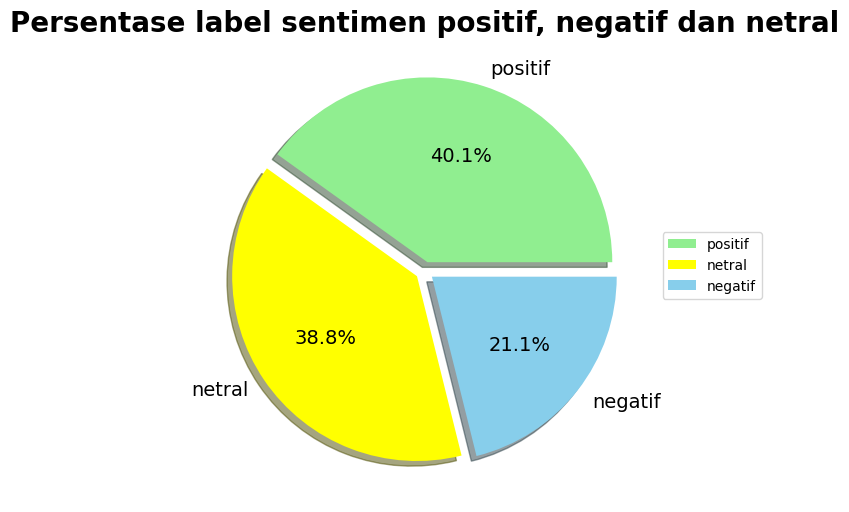

In [ ]:
import matplotlib.pyplot as plt

# Data sentiment_counts dan pengaturan warna
sentiment_counts = jmo['polarity'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values

# Warna sesuai dengan jumlah label
colors = ['lightgreen', 'yellow', 'skyblue']

# Membuat subplot dengan ukuran yang diinginkan
fig, ax = plt.subplots(figsize=(8, 6))

# Menentukan parameter explode
explode = (0.05, 0.05, 0.05)  # Masing-masing sentimen memiliki nilai explode yang berbeda

# Membuat diagram pie dengan modifikasi yang sama
ax.pie(sizes, labels=labels, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
       startangle=0, colors=colors, explode=explode, shadow=True, textprops={'fontsize': 14})

# Menambahkan judul
ax.set_title('Persentase label sentimen positif, negatif dan netral', fontsize=20, color='black', weight='bold')

# Menampilkan legenda di posisi khusus
plt.legend(bbox_to_anchor=(1, 0.6), labels=labels)

# Menampilkan diagram pie
plt.show()


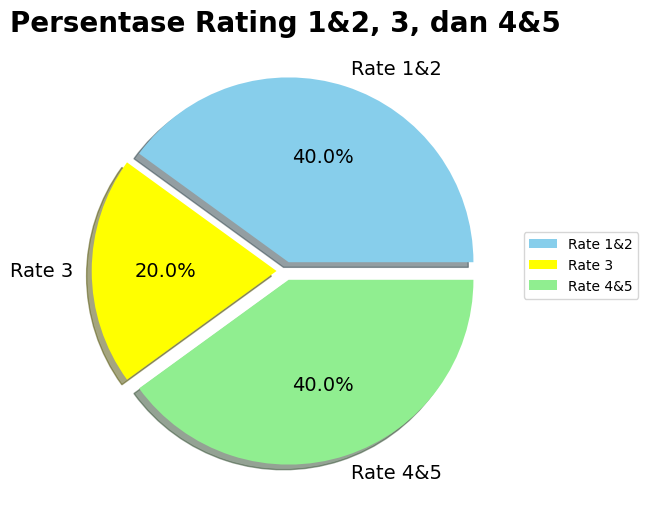

In [ ]:
import matplotlib.pyplot as plt

# Data rate_counts dan pengaturan warna
rate_counts = jmo['rate'].value_counts()

# Membagi data menjadi kelompok 1&2, 3, dan 4&5
rate_1_2_count = rate_counts[1] + rate_counts[2]
rate_3_count = rate_counts[3]
rate_4_5_count = rate_counts[4] + rate_counts[5]

labels_rate = ['Rate 1&2', 'Rate 3', 'Rate 4&5']
sizes_rate = [rate_1_2_count, rate_3_count, rate_4_5_count]

colors_rate = ['skyblue', 'yellow', 'lightgreen']  # Daftar warna yang sesuai dengan jumlah label

# Membuat subplot dengan ukuran yang diinginkan
fig, ax = plt.subplots(figsize=(8, 6))

# Menentukan parameter explode
explode_rate = (0.05, 0.05, 0.05)  # Memiliki tiga nilai untuk tiga bagian: 1&2, 3, 4&5

# Membuat diagram pie untuk rating dengan modifikasi yang sama
ax.pie(sizes_rate, labels=labels_rate, autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '',
       startangle=0, colors=colors_rate, explode=explode_rate, shadow=True, textprops={'fontsize': 14})

# Menambahkan judul untuk diagram rating
ax.set_title('Persentase Rating 1&2, 3, dan 4&5', fontsize=20, color='black', weight='bold')

# Menampilkan legenda di posisi khusus
plt.legend(bbox_to_anchor=(1, 0.6), labels=labels_rate)

# Menampilkan diagram pie rating
plt.show()


In [ ]:
# Mengonversikan sentimen menjadi 1 untuk positif dan -1 untuk negatif dan 0 untuk netral
sentimen = []
for convert in jmo['polarity']:
    if convert == "positif":
        num_polarity = 1
    elif convert == "negatif":
        num_polarity = -1
    else:
        num_polarity = 0
    sentimen.append(num_polarity)

jmo['sentimen_skor'] = sentimen

In [ ]:
jmo['sentimen_skor']

0        0
1        0
2        0
3       -1
4        0
        ..
45770   -1
45771    1
45772    0
45773    0
45774    1
Name: sentimen_skor, Length: 45775, dtype: int64

In [ ]:
jmo.sentimen_skor.value_counts()

 1    18348
 0    17759
-1     9668
Name: sentimen_skor, dtype: int64

In [ ]:
jmo.to_excel('Data Labeling.xlsx', index=False)

# **Sentiment WordCloud**

# **WordCloud untuk sentimen positif**

In [ ]:
jmo = pd.read_excel("Data Labeling.xlsx")
# Menampilkan data
jmo.head()

review  rate                   stopwords  \
0                        W, di Zxxazaz     2                 ['zxxazaz']   
1                         sangat zuper     5                   ['zuper']   
2                    V aja deh ya zona     3                    ['zona']   
3  Zodiak mm 😚😉😉mati,,,, xnxx 😍,,,,,,,     3  ['zodiak', 'mati', 'xnxx']   
4                              Ziiippp     3                   ['ziipp']   

           stemming english_translation  polarity_score polarity  \
0           zxxazaz             Zxxazaz             0.0   netral   
1             zuper               Zuper             0.0   netral   
2              zona                zone             0.0   netral   
3  zodiak mati xnxx    Zodiac dead xnxx            -0.2  negatif   
4             ziipp               Ziipp             0.0   netral   

   sentimen_skor  
0              0  
1              0  
2              0  
3             -1  
4              0

<ipython-input-34-cb7c6ae49749>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_data['english_translation'] = positive_data['english_translation'].apply(lambda x: ' '.join([word for word in x.split() if is_positive(word)]))


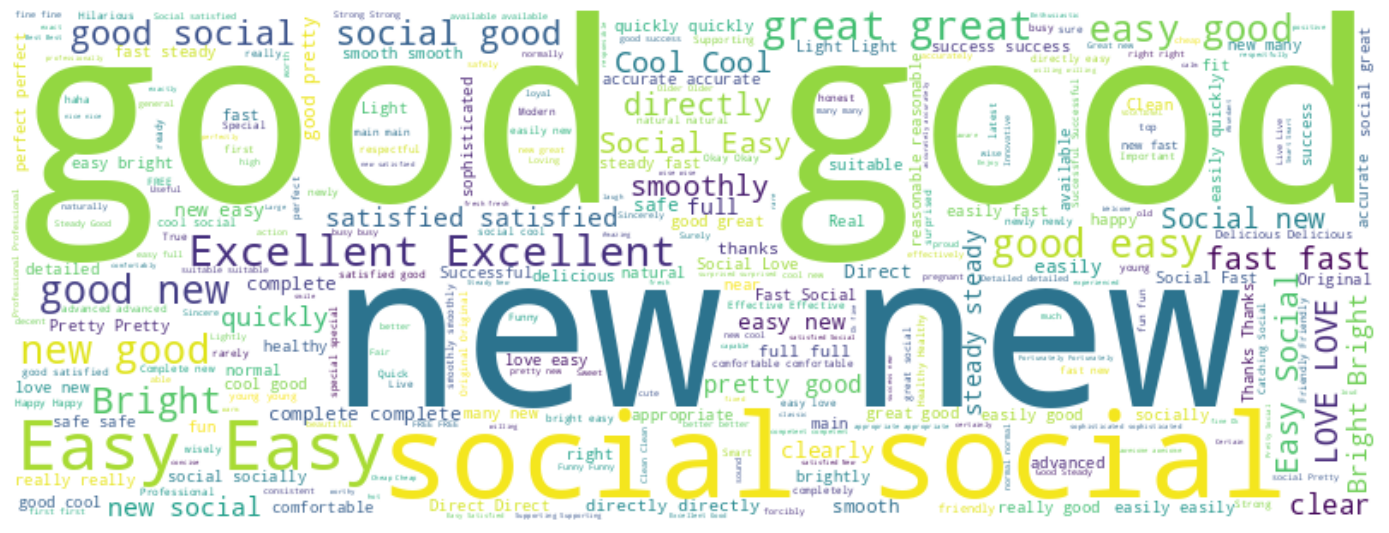

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
# Fungsi untuk mengidentifikasi apakah kata memiliki nilai polaritas di atas 0 berdasarkan TextBlob
def is_positive(word):
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    return polarity > 0

# Seleksi hanya data dengan sentimen_skor bernilai 1 dan kata-kata dengan nilai polaritas di atas 0 berdasarkan TextBlob
positive_data = jmo[jmo['sentimen_skor'] == 1]
positive_data['english_translation'] = positive_data['english_translation'].apply(lambda x: ' '.join([word for word in x.split() if is_positive(word)]))

# Menggabungkan kata-kata positif menjadi satu teks
sentiment_pos = ' '.join(positive_data['english_translation'])

# Membuat wordcloud dari teks positif
wordcloud = WordCloud(background_color='white', width=800, height=300, max_font_size=200, max_words=500).generate(sentiment_pos)

# Menampilkan wordcloud
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.axis("off")
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


# **WordCloud untuk sentimen negatif**

<ipython-input-35-1b386b510e91>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_data['english_translation'] = negative_data['english_translation'].apply(lambda x: ' '.join([word for word in x.split() if is_negative(word)]))


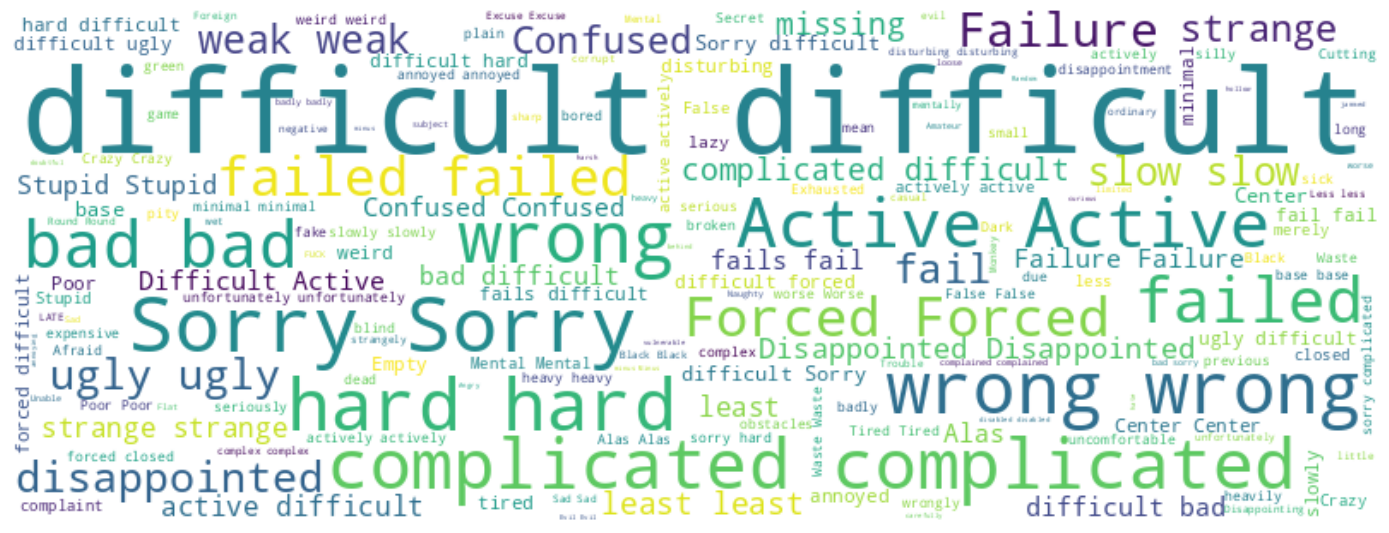

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
# Fungsi untuk mengidentifikasi apakah kata memiliki nilai polaritas di bawah 0 berdasarkan TextBlob
def is_negative(word):
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    return polarity < 0

# Seleksi hanya data dengan sentimen_skor bernilai -1 dan kata-kata dengan nilai polaritas di bawah 0 berdasarkan TextBlob
negative_data = jmo[jmo['sentimen_skor'] == -1]
negative_data['english_translation'] = negative_data['english_translation'].apply(lambda x: ' '.join([word for word in x.split() if is_negative(word)]))

# Menggabungkan kata-kata negatif menjadi satu teks
sentiment_neg = ' '.join(negative_data['english_translation'])

# Membuat wordcloud dari teks negatif
wordcloud = WordCloud(background_color='white', width=800, height=300, max_font_size=200, max_words=500).generate(sentiment_neg)

# Menampilkan wordcloud
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.axis("off")
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


# **WordCloud untuk sentimen netral**

<ipython-input-37-760c2fabde01>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neutral_data['english_translation'] = neutral_data['english_translation'].apply(lambda x: ' '.join([word for word in x.split() if is_neutral(word)]))


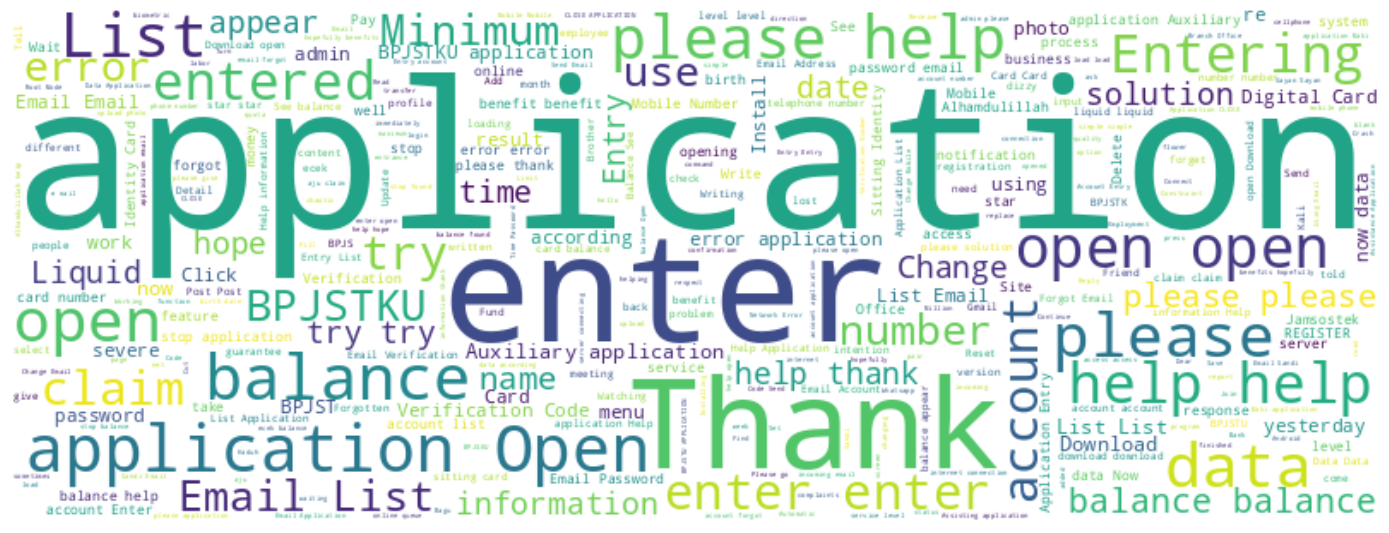

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
# Fungsi untuk mengidentifikasi apakah kata memiliki nilai polaritas netral (0) berdasarkan TextBlob
def is_neutral(word):
    blob = TextBlob(word)
    polarity = blob.sentiment.polarity
    return polarity == 0

# Seleksi hanya data dengan sentimen_skor bernilai 0 dan kata-kata dengan nilai polaritas netral (0) berdasarkan TextBlob
neutral_data = jmo[jmo['sentimen_skor'] == 0]
neutral_data['english_translation'] = neutral_data['english_translation'].apply(lambda x: ' '.join([word for word in x.split() if is_neutral(word)]))

# Menggabungkan kata-kata netral menjadi satu teks
sentiment_neutral = ' '.join(neutral_data['english_translation'])

# Membuat wordcloud dari teks netral
wordcloud = WordCloud(background_color='white', width=800, height=300, max_font_size=200, max_words=500).generate(sentiment_neutral)

# Menampilkan wordcloud
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.axis("off")
plt.tight_layout()
plt.imshow(wordcloud, interpolation="bilinear")
plt.show()


In [ ]:
jmo = jmo.replace('',np.nan, regex=True)

In [ ]:
jmo = jmo.dropna()

In [ ]:
jmo = jmo.reset_index(drop=True)

In [ ]:
# Read the data from the Excel file
jmo = pd.read_excel("Data Labeling.xlsx")

# Count the occurrences of each rating score (1 to 5)
score_counts = jmo['sentimen_skor'].value_counts().sort_index()

# Display the count for each rating score
for score in range(-1, 2):
    count = score_counts.get(score, 0)
    print(f"Score {score}: {count} reviews")


Score -1: 9668 reviews
Score 0: 17759 reviews
Score 1: 18348 reviews


In [ ]:
import pandas as pd

# Assuming you have already loaded your data into the 'jmo' DataFrame

# Count the number of reviews for each rating score
score_counts = jmo['sentimen_skor'].value_counts()

# Find the minimum count of reviews among all rating scores
min_count = score_counts.min()

# Function to filter reviews by score and non-empty stemming column
def filter_reviews_by_score_and_stemming(df, score, count):
    return df[(df['sentimen_skor'] == score) & (df['english_translation'].notnull())].sample(count, random_state=42)

# List to store DataFrames for each score
filtered_dataframes = []

# Loop through each rating score (1 to 5) and filter reviews
for score in range(-1, 2):
    filtered_df = filter_reviews_by_score_and_stemming(jmo, score, min_count)
    filtered_dataframes.append(filtered_df)

# Concatenate all the filtered DataFrames into a single DataFrame
final_data = pd.concat(filtered_dataframes, ignore_index=True)

# Display the final DataFrame as a table
display(final_data)

# Save the final DataFrame to a new Excel file (optional)
final_data.to_excel("Filtered_Data_Polarity.xlsx", index=False)


review  rate  \
0                                     Force closed terus     3   
1      Antrianya tidak beraturan sangat mengecewakan ...     2   
2                                            masih ribet     4   
3      Kenapa tanggapan nya selalu gagal padahal udah...     5   
4      Setelah update kenapa tidak bisa masuk selalu ...     1   
...                                                  ...   ...   
28999          Sayang tdk terupdate setiap bulan datanya     3   
29000                               Bagus mudah difahami     5   
29001                                           baguusss     4   
29002  Sya tidak bisa log in aplikasinya, dengan kete...     3   
29003  Sangat sangat membantu dan memudahkan semua ur...     5   

                                               stopwords  \
0                                     ['paksa', 'tutup']   
1      ['antreannya', 'beraturan', 'mengecewakan', 's...   
2                                     ['masuk', 'rumit']   
3                        ['tanggapan', 'gagal', 'diisi']   
4      ['perbarui', 'masuk', 'sandi', 'email', 'salah...   
...                                                  ...   
28999                      ['sayang', 'terbaru', 'data']   
29000                     ['bagus', 'mudah', 'dipahami']   
29001                                          ['bagus']   
29002  ['aplikasi', 'keterangan', 'email', 'terdaftar...   
29003  ['membantu', 'memudahkan', 'urusan', 'jamsostek']   

                                                stemming  \
0                                            paksa tutup   
1                        antre atur kecewa sesuai tunggu   
2                                            masuk rumit   
3                                      tanggap gagal isi   
4             baru masuk sandi email salah bpjstku gagal   
...                                                  ...   
28999                                   sayang baru data   
29000                                  bagus mudah paham   
29001                                              bagus   
29002  aplikasi terang email daftar sblmya daftar sesuai   
29003                         bantu mudah urus jamsostek   

                                     english_translation  polarity_score  \
0                                        Forced to close       -0.300000   
1        queue up and disappointed according to the wait       -0.750000   
2                                            complicated       -0.500000   
3                                 Response fails to fill       -0.500000   
4      just entered the email password wrong bpjstku ...       -0.500000   
...                                                  ...             ...   
28999                                      Dear new data        0.136364   
29000                            good easy to understand        0.566667   
29001                                               Good        0.700000   
29002  Bright Email Application Register before the l...        0.600000   
29003                 help easily take care of Jamsostek        0.433333   

      polarity  sentimen_skor  
0      negatif             -1  
1      negatif             -1  
2      negatif             -1  
3      negatif             -1  
4      negatif             -1  
...        ...            ...  
28999  positif              1  
29000  positif              1  
29001  positif              1  
29002  positif              1  
29003  positif              1  

[29004 rows x 8 columns]

In [ ]:
# Read the data from the Excel file
jmo = pd.read_excel("Filtered_Data_Polarity.xlsx")

# Count the occurrences of each rating score (1 to 5)
score_counts = jmo['sentimen_skor'].value_counts().sort_index()

# Display the count for each rating score
for score in range(-1, 2):
    count = score_counts.get(score, 0)
    print(f"Score {score}: {count} reviews")


Score -1: 9668 reviews
Score 0: 9668 reviews
Score 1: 9668 reviews


# **LSTM METHOD**

# **LSTM**

In [ ]:
!gdown --id 1up204C9wnDg6wNAJgeoh5ed9nU_Iao-l

In [ ]:
jmo = pd.read_excel("Filtered_Data_Polarity.xlsx")
# Menampilkan data
jmo.head()

review  rate  \
0                                 Force closed terus     3   
1  Antrianya tidak beraturan sangat mengecewakan ...     2   
2                                        masih ribet     4   
3  Kenapa tanggapan nya selalu gagal padahal udah...     5   
4  Setelah update kenapa tidak bisa masuk selalu ...     1   

                                           stopwords  \
0                                 ['paksa', 'tutup']   
1  ['antreannya', 'beraturan', 'mengecewakan', 's...   
2                                 ['masuk', 'rumit']   
3                    ['tanggapan', 'gagal', 'diisi']   
4  ['perbarui', 'masuk', 'sandi', 'email', 'salah...   

                                     stemming  \
0                                 paksa tutup   
1             antre atur kecewa sesuai tunggu   
2                                 masuk rumit   
3                           tanggap gagal isi   
4  baru masuk sandi email salah bpjstku gagal   

                                 english_translation  polarity_score polarity  \
0                                    Forced to close           -0.30  negatif   
1    queue up and disappointed according to the wait           -0.75  negatif   
2                                        complicated           -0.50  negatif   
3                             Response fails to fill           -0.50  negatif   
4  just entered the email password wrong bpjstku ...           -0.50  negatif   

   sentimen_skor  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

In [ ]:
X = jmo['english_translation']
y = jmo['sentimen_skor']

In [ ]:
jmo.head()

review  rate  \
0                                 Force closed terus     3   
1  Antrianya tidak beraturan sangat mengecewakan ...     2   
2                                        masih ribet     4   
3  Kenapa tanggapan nya selalu gagal padahal udah...     5   
4  Setelah update kenapa tidak bisa masuk selalu ...     1   

                                           stopwords  \
0                                 ['paksa', 'tutup']   
1  ['antreannya', 'beraturan', 'mengecewakan', 's...   
2                                 ['masuk', 'rumit']   
3                    ['tanggapan', 'gagal', 'diisi']   
4  ['perbarui', 'masuk', 'sandi', 'email', 'salah...   

                                     stemming  \
0                                 paksa tutup   
1             antre atur kecewa sesuai tunggu   
2                                 masuk rumit   
3                           tanggap gagal isi   
4  baru masuk sandi email salah bpjstku gagal   

                                 english_translation  polarity_score polarity  \
0                                    Forced to close           -0.30  negatif   
1    queue up and disappointed according to the wait           -0.75  negatif   
2                                        complicated           -0.50  negatif   
3                             Response fails to fill           -0.50  negatif   
4  just entered the email password wrong bpjstku ...           -0.50  negatif   

   sentimen_skor  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, precision_score
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Memisahkan data berdasarkan sentimen positif, negatif, dan netral
positive_data = jmo[jmo['sentimen_skor'] == 1]
negative_data = jmo[jmo['sentimen_skor'] == -1]
neutral_data = jmo[jmo['sentimen_skor'] == 0]

# Menghitung jumlah data pada masing-masing sentimen
num_positive = len(positive_data)
num_negative = len(negative_data)
num_neutral = len(neutral_data)

# Menentukan ukuran data train untuk setiap sentimen
train_size = 0.8  # Misalnya, menggunakan 80% data untuk data train

# Menghitung jumlah data train untuk setiap sentimen
num_train_positive = int(train_size * num_positive)
num_train_negative = int(train_size * num_negative)
num_train_neutral = int(train_size * num_neutral)

# Memisahkan data train dan data test untuk masing-masing sentimen
train_positive, test_positive = train_test_split(positive_data, train_size=num_train_positive, random_state=42)
train_negative, test_negative = train_test_split(negative_data, train_size=num_train_negative, random_state=42)
train_neutral, test_neutral = train_test_split(neutral_data, train_size=num_train_neutral, random_state=42)

# Menggabungkan data train dari masing-masing sentimen
train_data = pd.concat([train_positive, train_negative, train_neutral], ignore_index=True)

# Menggabungkan data test dari masing-masing sentimen
test_data = pd.concat([test_positive, test_negative, test_neutral], ignore_index=True)

# Menampilkan jumlah data pada data train dan data test untuk masing-masing sentimen
print("Jumlah data train positif:", len(train_positive))
print("Jumlah data train negatif:", len(train_negative))
print("Jumlah data train netral:", len(train_neutral))
print("Total jumlah data train:", len(train_data))

print("Jumlah data test positif:", len(test_positive))
print("Jumlah data test negatif:", len(test_negative))
print("Jumlah data test netral:", len(test_neutral))
print("Total jumlah data test:", len(test_data))

# Definisi class labels dan indicesnya
class_labels = ['-1', '0', '1']

# Menggabungkan data train dan data test
X_train = train_data['english_translation']
X_test = test_data['english_translation']
y_train = train_data['sentimen_skor']
y_test = test_data['sentimen_skor']

# Tokenisasi teks
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding untuk mendapatkan panjang yang sama
max_seq_length = max([len(seq) for seq in X_train_seq])
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

# Encode label
label_encoder = LabelEncoder()
label_encoder.fit(class_labels)
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_seq_length))
model.add(LSTM(128))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_encoded, epochs=10, batch_size=32, verbose=1)

# Evaluate the model on test data
predict = model.predict(X_test_pad)
predict_classes = np.argmax(predict, axis=1)
confusion = confusion_matrix(y_test_encoded, predict_classes)
classification = classification_report(y_test_encoded, predict_classes, target_names=class_labels)
accuracy = accuracy_score(y_test_encoded, predict_classes)
recall = recall_score(y_test_encoded, predict_classes, average='weighted')
precision = precision_score(y_test_encoded, predict_classes, average='weighted')

print('Confusion Matrix:\n', confusion)
print('Classification Report:\n', classification)
print("Accuracy Score:", round(accuracy, 2))
print("Recall Score:", round(recall, 2))
print("Precision Score:", round(precision, 2))


Jumlah data train positif: 7734
Jumlah data train negatif: 7734
Jumlah data train netral: 7734
Total jumlah data train: 23202
Jumlah data test positif: 1934
Jumlah data test negatif: 1934
Jumlah data test netral: 1934
Total jumlah data test: 5802
Epoch 1/10
726/726 [==============================] - 134s 176ms/step - loss: 0.2782 - accuracy: 0.8938
Epoch 2/10
726/726 [==============================] - 116s 160ms/step - loss: 0.0665 - accuracy: 0.9806
Epoch 3/10
726/726 [==============================] - 119s 164ms/step - loss: 0.0387 - accuracy: 0.9887
Epoch 4/10
726/726 [==============================] - 116s 160ms/step - loss: 0.0298 - accuracy: 0.9918
Epoch 5/10
726/726 [==============================] - 117s 161ms/step - loss: 0.0246 - accuracy: 0.9930
Epoch 6/10
726/726 [==============================] - 114s 157ms/step - loss: 0.0195 - accuracy: 0.9941
Epoch 7/10
726/726 [==============================] - 117s 161ms/step - loss: 0.0229 - accuracy: 0.9931
Epoch 8/10
726/726 [=====

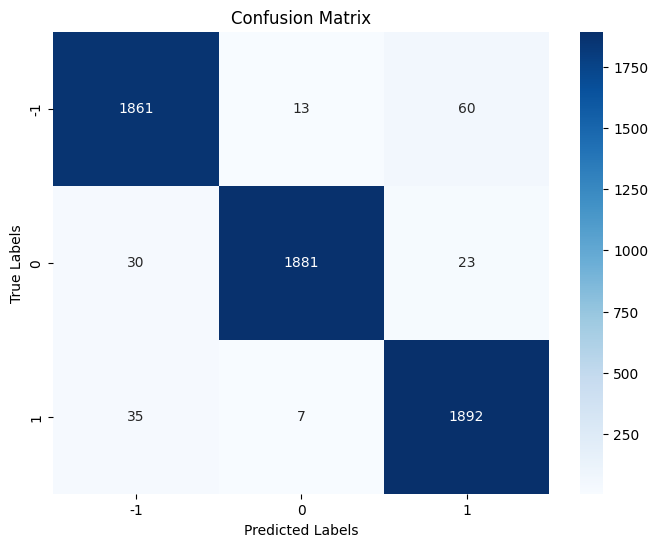

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
